In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
def displayPath(path: str, rows: int, columns: int):
    path_imgs = os.listdir(path)[:(rows*columns)]
    plt.figure(figsize=(10, 10))
    plt.suptitle("Images From " + path, fontsize=30, font='bold')
    for i, img_name in enumerate(path_imgs):
        img_path = os.path.join(path, img_name)
        img = plt.imread(img_path)

        label = img_name.split('.')[0]

        plt.subplot(rows, columns, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyapmaher/fruits-dataset-images")

print("Path to dataset files:", path)

c:\Users\Hitech\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 205M/205M [00:22<00:00, 9.34MB/s] 

Extracting files...


Path to dataset files: C:\Users\Hitech\.cache\kagglehub\datasets\shreyapmaher\fruits-dataset-images\versions\1


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DATASET PATH
dataset_path = '/root/.cache/kagglehub/datasets/shreyapmaher/fruits-dataset-images/versions/1/images'

# PARAMETERS
batch_size = 32
img_height = 224
img_width = 224

# ImageDataGenerator with rescaling and validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Number of classes
n_classes = len(train_generator.class_indices)

print(f"Number of classes: {n_classes}")
print(f"Class labels: {train_generator.class_indices}")


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/root/.cache/kagglehub/datasets/shreyapmaher/fruits-dataset-images/versions/1/images'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

# Load InceptionV3 base model without the top layer (Only BackBone)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new layers on top of the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add dropout for regularization
predictions = layers.Dense(n_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Fine-tuning strategy: unfreeze only the last few layers for fine-tuning
for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.1781 - loss: 2.2461 - val_accuracy: 0.7324 - val_loss: 1.2308
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.6077 - loss: 1.2794 - val_accuracy: 0.8732 - val_loss: 0.7450
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.8850 - loss: 0.7126 - val_accuracy: 0.8873 - val_loss: 0.5278
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9425 - loss: 0.4597 - val_accuracy: 0.8732 - val_loss: 0.3959
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9173 - loss: 0.3996 - val_accuracy: 0.8873 - val_loss: 0.3290
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9487 - loss: 0.2753 - val_accuracy: 0.8873 - val_loss: 0.2876
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9756 - loss: 0.1877 - val_accuracy: 0.8873 - val_loss: 0.2654
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9861 - loss: 0.1746 - val_accuracy: 0.8873 - val_loss: 0.2486
Epoch 9/

In [ ]:
def get_class_label(one_hot_encoded_label):
    class_index = np.argmax(one_hot_encoded_label)
    class_label = list(train_generator.class_indices.keys())[class_index]
    return class_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


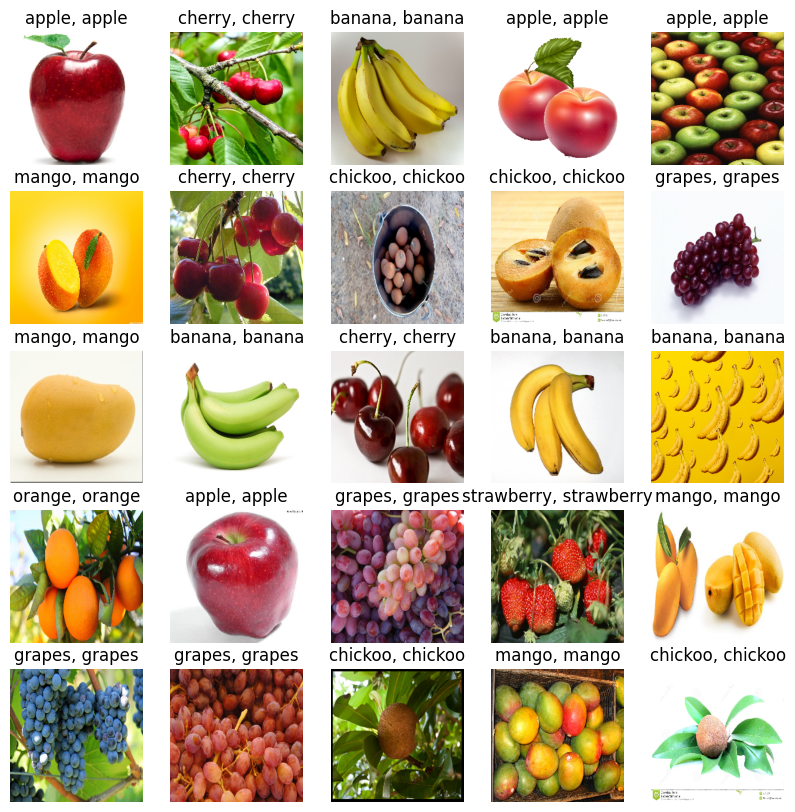

In [ ]:
# Retrieve a batch of images and labels
batch_imgs, batch_labels = next(train_generator)
batch_predictions = model.predict(batch_imgs)

# Display the first few images with their class labels
try_n = 5
plt.figure(figsize=(10, 10))
for i in range(try_n*try_n):
    ax = plt.subplot(try_n, try_n, i + 1)
    plt.imshow(batch_imgs[i])
    # Convert one-hot encoded label to class label
    label = get_class_label(batch_labels[i])
    label_predict = get_class_label(batch_predictions[i])
    plt.title(label_predict.split(' ')[0] + ", " + label.split(' ')[0])
    plt.axis("off")
plt.show()

In [ ]:
model.evaluate(train_generator)

9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 1.0000 - loss: 0.0345


[0.0356314517557621, 1.0]

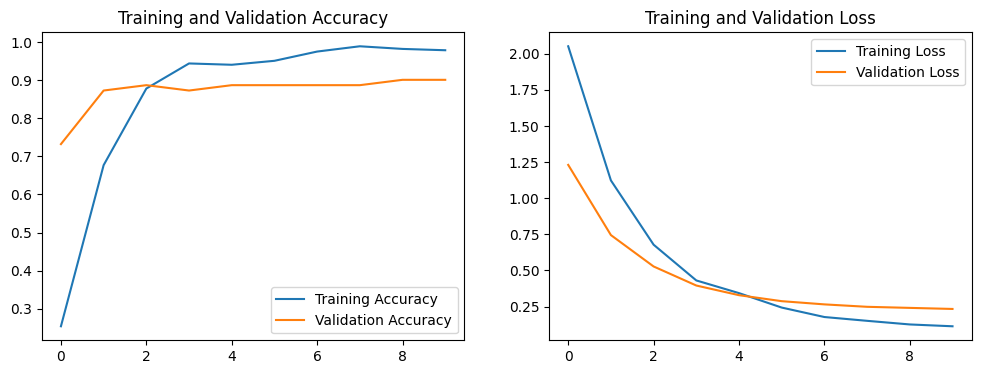

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
model.save('/kaggle/working/model_fruits.h5')

In [ ]:
os.listdir('/kaggle/working/')

['model_fruits.h5']

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    print(f"Predicted class: {class_labels[predicted_class]}")


In [ ]:
predict_image('/Image_4.JPG')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Predicted class: banana fruit


In [ ]:
predict_image('/content/Image_6.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Predicted class: orange fruit
